# MARATONA BEHIND THE CODE 2021

## DESAFIO 1: BANTOTAL

##### Autor: Rodrigo Oliveira
##### LinkedIn: https://www.linkedin.com/in/rodrigolima82/

- `"ID":` Número identificador dos clientes
- `"CHECKING_BALANCE":` Saldo que o cliente possui em sua conta corrente
- `"PAYMENT_TERM":` Quantidade de dias que o cliente tem que pagar o emprestimo
- `"CREDIT_HISTORY":` Situacao crediticia do passado do cliente
- `"LOAN_PURPOSE":` Motivo do emprestimo
- `"LOAN_AMOUNT":` Montante do emprestimo
- `"EXISTING_SAVINGS":` Saldo na poupanca
- `"EMPLOYMENT_DURATION":` Quantos anos o cliente esta no emprego atual
- `"INSTALLMENT_PERCENT":` Valor das parcelas em que o empréstimo deve ser pago
- `"SEX":` Sexo do cliente
- `"OTHERS_ON_LOAN":` Denota a existência de um fiador ou outro requerente de empréstimo
- `"CURRENT_RESIDENCE_DURATION":` Anos que o cliente esteve na sua última residência
- `"PROPERTY":` Indica se o cliente possui alguma propriedade em seu nome
- `"AGE":` Idade do cliente
- `"INSTALLMENT_PLANS":` Plano de financiamento, que pode ser bancário, externo ou nenhum
- `"HOUSING":` Indica se o cliente possui casa própria
- `"EXISTING_CREDITS_COUNT":` Número de empréstimos concedidos ao cliente no passado
- `"JOB_TYPE":` Tipo de emprego: 0 - desempregado, 1 - não qualificado, 2 - autônomo, 3 - qualificado
- `"DEPENDENTS":` Número de pessoas com acesso à conta
- `"TELEPHONE":` Indica se o cliente tem um número de telefone registrado
- `"FOREIGN_WORKER":` Indica se o cliente trabalha em um país fora do banco

# Parte 01. Importando as bibliotecas

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Parte 02. Carregando o Dataset

In [156]:
# Carregando o dataset LOANS
loansDF = pd.read_csv('../../data/LOANS.csv')

# Visualizando os primeiros registros
print(loansDF.shape)
loansDF.head()

(3999, 8)


,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [157]:
# Carregando o dataset ACCOUNTS
accountsDF = pd.read_csv('../../data/ACCOUNTS.csv')

# Visualizando os primeiros registros
print(accountsDF.shape)
accountsDF.head()

(2477, 5)


,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [158]:
# Carregando o dataset DEMOGRAPHICS
demoDF = pd.read_csv('../../data/DEMOGRAPHICS.csv')

# Visualizando os primeiros registros
print(demoDF.shape)
demoDF.head()

(3936, 11)


,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [159]:
# Carregando o dataset ANSWERS
answers = pd.read_csv('../../data/ANSWERS.csv')

# Visualizando os primeiros registros
print(answers.shape)
answers.head()

(1000, 22)


,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


In [171]:
# Realizando o Join dos 3 datasets
joinDF = loansDF.join(accountsDF.set_index('ID'), on='ID', how='left')
fullDF = joinDF.join(demoDF.set_index('ID'), on='ID', how='left')

# Realizando o join com answers
fullDF = fullDF.append(answers)

# Visualizando os primeiros registros
print(fullDF.shape)
fullDF.head()

(4999, 22)


,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,CHECKING_BALANCE,CREDIT_HISTORY,...,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Parte 03. Tratamento dos dados

In [199]:
# todas as colunas do desafio
challenge_columns = ['ID', 'CHECKING_BALANCE', 'PAYMENT_TERM', 'CREDIT_HISTORY',
                     'LOAN_PURPOSE', 'LOAN_AMOUNT', 'EXISTING_SAVINGS',
                     'EMPLOYMENT_DURATION', 'INSTALLMENT_PERCENT', 'SEX', 'OTHERS_ON_LOAN',
                     'CURRENT_RESIDENCE_DURATION', 'PROPERTY', 'AGE', 'INSTALLMENT_PLANS',
                     'HOUSING', 'EXISTING_CREDITS_COUNT', 'JOB_TYPE', 'DEPENDENTS',
                     'TELEPHONE', 'FOREIGN_WORKER']

# colunas categoricas
cat_columns = ['PROPERTY','SEX','OTHERS_ON_LOAN','INSTALLMENT_PLANS','LOAN_PURPOSE']

# features do modelo
features = ['PROPERTY','SEX','OTHERS_ON_LOAN','EMPLOYMENT_DURATION','INSTALLMENT_PLANS','EXISTING_CREDITS_COUNT','LOAN_PURPOSE']

# coluna a ser prevista
target   = ['ALLOW']

# Remover todas as colunas que não são features do nosso modelo
unwanted_columns = list((set(challenge_columns) - set(target)) - set(features)) 

In [200]:
def fe(df, train=True):
    
    # Removendo os valores missing de algumas colunas
    df['EXISTING_CREDITS_COUNT'].fillna(0, inplace=True)
    df['LOAN_PURPOSE'].fillna('OTHERS', inplace=True)
    df['ALLOW'] = np.where(df['ALLOW'] == 'TO_FILL', -1, df['ALLOW'])
    df = df.apply(pd.to_numeric, errors='ignore')

    df = df.drop([
                    'INSTALLMENT_PERCENT',
                    'DEPENDENTS',
                    'CREDIT_HISTORY',
                    'CURRENT_RESIDENCE_DURATION',
                    'JOB_TYPE',
                    'CHECKING_BALANCE',
                    'ID',
                    'HOUSING',
                    'LOAN_AMOUNT',
                    'EXISTING_SAVINGS',
                    'PAYMENT_TERM',
                    'TELEPHONE',
                    'AGE',
                    'FOREIGN_WORKER'
                    ], axis = 1)

    
    if train:
        df = df.dropna()   

    # Criando instancia do LabelEncoder
    le = LabelEncoder()
    for cols in cat_columns:
        fe_labels = le.fit_transform(df[cols])
        df[cols] = fe_labels     
               
    return df    

In [201]:
# Aplicando Feature Engineering
df = fe(fullDF, True)

In [202]:
# Exibindo informacoes do dataset final
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 63 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INSTALLMENT_PLANS       4846 non-null   int64  
 1   LOAN_PURPOSE            4846 non-null   int64  
 2   OTHERS_ON_LOAN          4846 non-null   int64  
 3   ALLOW                   4846 non-null   int64  
 4   EXISTING_CREDITS_COUNT  4846 non-null   float64
 5   SEX                     4846 non-null   int64  
 6   EMPLOYMENT_DURATION     4846 non-null   float64
 7   PROPERTY                4846 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 340.7 KB


In [203]:
# Exibindo informacoes de valores unicos em cada coluna
for cols in df.columns:
  print(cols+": ",df[cols].unique())

INSTALLMENT_PLANS:  [1 2 0]
LOAN_PURPOSE:  [ 0  2  4  3 10  8  6  5  9 11  1  7]
OTHERS_ON_LOAN:  [0 2 1]
ALLOW:  [ 0  1 -1]
EXISTING_CREDITS_COUNT:  [0. 1. 2. 3.]
SEX:  [1 0]
EMPLOYMENT_DURATION:  [14.  0.  7.  9. 12.  6.  4.  3.  8.  2.  5. 11.  1. 10. 15. 13. 16. 17.
 18.]
PROPERTY:  [2 3 1 0]


### Avaliando a correlação dos dados após as transformações

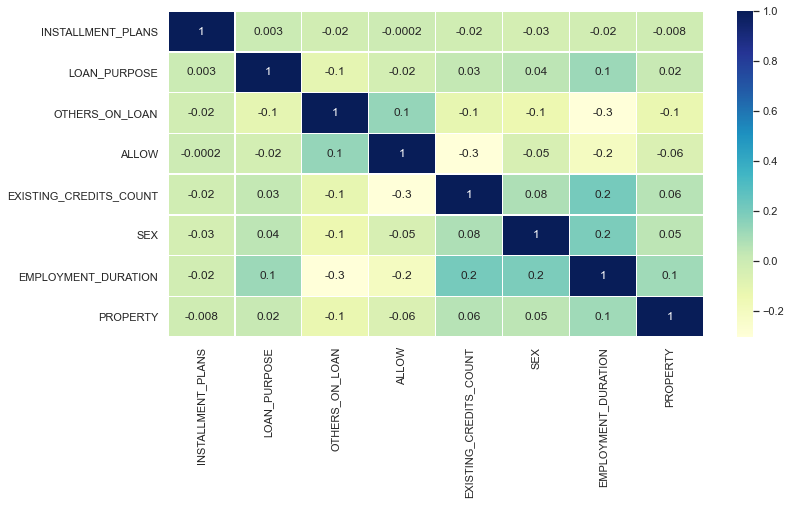

In [204]:
sns.set(rc={'figure.figsize':(12, 6)})
corr = df.corr()
plt.figure() 
ax = sns.heatmap(corr, linewidths=.5, annot=True, cmap="YlGnBu", fmt='.1g')
plt.show()

# Parte 04. Modelagem Preditiva

In [205]:
# Separa dataset de treino e teste depois de aplicar Feature Engineering
treino = df[df['ALLOW'] != -1]
teste = df[df['ALLOW'] == -1]

In [206]:
def modeling(data, features, target):

    X = data[features]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    params = {'learning_rate': 0.054344237818007034,
              'lambda_l1': 0.03541689891929658,
              'lambda_l2': 0.004983025766768209,
              'num_leaves': 73,
              'feature_fraction': 0.40105082259912805,
              'bagging_fraction': 0.4792375728528322,
              'bagging_freq': 1,
              'min_child_samples': 51}

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("f1 Score (Test): %f" % f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))    

    return model

In [207]:
# Criando o modelo de ML
model = modeling(treino, features, target)

/Users/rodrigolima82/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] bagging_fraction is set=0.4792375728528322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4792375728528322
[LightGBM] [Warning] feature_fraction is set=0.40105082259912805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40105082259912805
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.004983025766768209, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004983025766768209
[LightGBM] [Warning] lambda_l1 is set=0.03541689891929658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03541689891929658
f1 Score (Test): 0.808577
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       389
           1       0.82      0.92      0.87       765

    accuracy                           0.82      1154
   macro avg       0.81      0.77      0.78      1154
weighted avg      

# Parte 05. Realizando Previsoes

In [151]:
# Removendo ID dataset de teste
X_test = teste[features]
X_test.head()

,PROPERTY,SEX,OTHERS_ON_LOAN,EMPLOYMENT_DURATION,INSTALLMENT_PLANS,EXISTING_CREDITS_COUNT,LOAN_PURPOSE
0,1,0,2,0.0,2,1.0,2
1,1,1,0,0.0,2,1.0,2
2,2,1,2,6.0,2,2.0,8
3,0,1,2,6.0,1,2.0,3
4,0,0,2,4.0,2,1.0,5


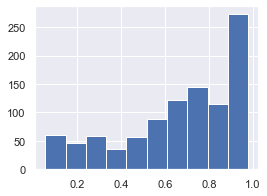

In [154]:
# Realizando previsoes com dados de answers
answers['ALLOW'] = model.predict(X_test)

sns.set(rc={'figure.figsize':(4, 3)})
plt.figure() 

plt.hist(model.predict_proba(X_test)[:,1])
plt.show()

# Parte 06. Salvar resultado

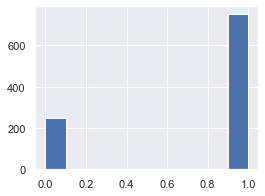

In [153]:
answers.to_csv('../../submissao/ANSWERS2.csv', index=False)
plt.hist(answers.ALLOW)
plt.show()